In [ ]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Reading the input data
data = pd.read_table('human_data.txt')

In [ ]:
#exploring our dataset
data                 #The seven gene families are G-protein coupled receptors, thyrosine kinase, thyrosine phosphate, synthatase, synthase, Ion channel, transcription factor

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3
...,...,...
4375,ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...,0
4376,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4377,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6
4378,ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...,6


In [ ]:
print ('Dataset contain null:\t',data.isnull().values.any())
print ('Describe null:\n',data.isnull().sum())
print ('No of  null:\t',data.isnull().sum().sum())

Dataset contain null:	 False
Describe null:
 class    0
words    0
dtype: int64
No of  null:	 0


In [ ]:
#converting our large DNA sequence into k-mers words, fixing size = 6
def k_mers(sequence, size=6):
  return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [ ]:
#calling the k-mer function
data['words'] = data.apply(lambda x: k_mers(x['sequence']), axis=1)

In [ ]:
#dropping our sequence column as we further donot need that
data = data.drop('sequence', axis = 1)

In [ ]:
#checking our k_mer words in our dataset
data

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."
...,...,...
4375,0,"[atggaa, tggaag, ggaaga, gaagat, aagatt, agatt..."
4376,6,"[atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct..."
4377,6,"[atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct..."
4378,6,"[atgggg, tggggc, ggggca, gggcac, ggcacc, gcacc..."


<Axes: >

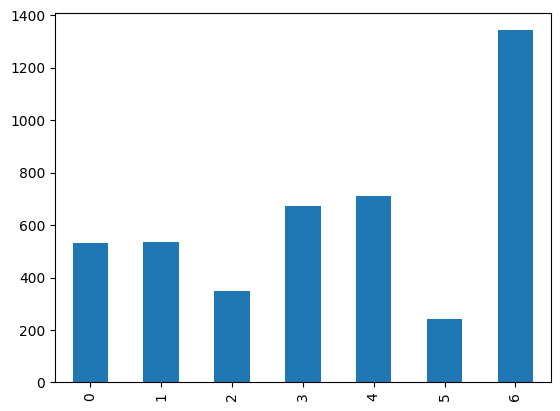

In [ ]:
#plotting the graph for these classes
data['class'].value_counts().sort_index().plot.bar()

In [ ]:
#converting these k-mer words to string sentences for easy processing
data_texts = list(data['words'])
for item in range(len(data_texts)):
  data_texts[item] = ' '.join(data_texts[item])
y_data = data.iloc[:, 0].values      #target variable

In [ ]:
print(data_texts[2])

atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggcatt gcattt catttg atttgg tttggg ttgggc tgggcg gggcgc ggcgct gcgctg cgctgt gctgtt ctgttt tgtttg gtttgg tttggc ttggca tggcag ggcagt gcagtg cagtga agtgat gtgatg tgatga gatgat atgatt tgattg gattgc attgcc ttgcct tgcctt gccttt cctttc ctttct tttctg ttctgt tctgtt ctgttc tgttca gttcag ttcagt tcagtg cagtgt agtgtc gtgtct tgtctg gtctga tctgag ctgagt tgagtg gagtgc agtgct gtgcta tgctat gctatg ctatga tatgaa atgaag tgaaga gaagat aagatt agattg gattgc attgca ttgcac tgcaca gcacac cacaca acacag cacaga acagag cagagg agaggt gaggtc aggtcc ggtcca gtccag tccaga ccagat cagatg agatgc gatgca atgcat tgcatt gcattc cattcc attccg ttccgt tccgtt ccgttt cgtttt gttttg ttttga tttgag ttgaga tgagaa gagaat agaatg gaatgt aatgtc atgtca tgtcaa gtcaat tcaatg caatgg aatgga atggat tggata ggatac gataca atacac tacacc acacca caccaa accaac ccaact caactg aactgc actgct ctgctg tgctgc gctgct ctgctt tgcttt gctttg ctttgg tttgga ttggat tggatt ggattt gatttc atttca tttcac ttcacc tcaccg caccgg accggt

In [ ]:
y_data

array([4, 4, 3, ..., 6, 6, 6])

In [ ]:
#converting these strings into bag of words using count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(data_texts)

In [ ]:
#splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size = 0.25, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(3285, 232414)
(1095, 232414)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions_test_rf = rf_classifier.predict(X_test)

# Calculate and print accuracy
accuracy_test_rf = accuracy_score(y_test, predictions_test_rf)
print('Accuracy using random forest:', accuracy_test_rf)



Accuracy using random forest: 0.45844748858447487


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions_test_dt = dt_classifier.predict(X_test)

# Calculate and print accuracy
accuracy_test_dt = accuracy_score(y_test, predictions_test_dt)
print('Accuracy using decision trees:', accuracy_test_dt)



Accuracy using decision trees: 0.8045662100456621


In [ ]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions_test_svm = svm_classifier.predict(X_test)

# Calculate and print accuracy
accuracy_test_svm = accuracy_score(y_test, predictions_test_svm)
print('Accuracy using SVM:', accuracy_test_svm)


Accuracy using SVM: 0.8127853881278538
